# 機械学習フロー

# 【問題1】クロスバリデーション

事前学習期間では検証用データをはじめに分割しておき、それに対して指標値を計算することで検証を行っていました。（ホールドアウト法）しかし、分割の仕方により精度は変化します。実践的には クロスバリデーション（交差検証） を行います。分割を複数回行い、それぞれに対して学習と検証を行う方法です。複数回の分割のためにscikit-learnにはKFoldクラスが用意されています。

事前学習期間の課題で作成したベースラインモデルに対してKFoldクラスによるクロスバリデーションを行うコードを作成し実行してください。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno


In [2]:
df = pd.read_csv("../application_train.csv")
df_se = df.loc[:,["TARGET","AMT_INCOME_TOTAL","AMT_CREDIT"]]

df_se.head()     


,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT
0,1,202500.0,406597.5
1,0,270000.0,1293502.5
2,0,67500.0,135000.0
3,0,135000.0,312682.5
4,0,121500.0,513000.0


In [3]:
X = df_se.loc[: , ("AMT_INCOME_TOTAL","AMT_CREDIT")]
X = X.values
X.shape
X

array([[ 202500. ,  406597.5],
       [ 270000. , 1293502.5],
       [  67500. ,  135000. ],
       ...,
       [ 153000. ,  677664. ],
       [ 171000. ,  370107. ],
       [ 157500. ,  675000. ]])

In [4]:
#X.iloc[:10, 1]

In [5]:
#X.values[:10,1]

In [6]:
y = df_se.loc[:, "TARGET"]
y= y.values
y.shape
y
#pd.DataFrame(y)

array([1, 0, 0, ..., 0, 1, 0])

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle = True, random_state = 4)
rfc = RandomForestClassifier()
result = cross_val_score(rfr,X, y,scoring='roc_auc', cv=kf)

NameError: name 'rfr' is not defined

In [ ]:
print(result)

In [8]:
result_average = result.mean() # 平均をとる
result_average

NameError: name 'result' is not defined

""""""
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle = True, random_state = 4)
for train, test in kf.split(df):
    
    X_train_df, X_test_df  = X.iloc[train], X.iloc[test]
    y_train_df, y_test_df  = y.iloc[train], y.iloc[test]
    print(X_train_df,X_test_df)
    print(y_test_df)
""""""

# 【問題2】グリッドサーチ

これまで分類器のパラメータには触れず、デフォルトの設定を使用していました。パラメータの詳細は今後のSprintで学んでいくことになります。機械学習の前提として、パラメータは状況に応じて最適なものを選ぶ必要があります。最適なパラメータを探していくことを パラメータチューニング と呼びます。パラメータチューニングをある程度自動化する単純な方法としては グリッドサーチ があります。

scikit-learnのGridSearchCVを使い、グリッドサーチを行うコードを作成してください。そして、ベースラインモデルに対して何らかしらのパラメータチューニングを行なってください。どのパラメータをチューニングするかは、使用した手法の公式ドキュメントを参考にしてください。

GridSearchCVクラスには引数としてモデル、探索範囲、さらにクロスバリデーションを何分割で行うかを与えます。クロスバリデーションの機能も含まれているため、これを使用する場合はKFoldクラスを利用する必要はありません。

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix #最後の評価用の混同行列を出力するconfusion_matrix

In [10]:
### 探索するパラメータ空間
def param():
  ret = {
      'n_estimators':[10,1000],
      'max_depth':[2,20],
  }
  return ret


In [11]:
# GridSearchCVのインスタンスを作成&学習&スコア記録

gscv = GridSearchCV(rfc, param(), cv=3)
gscv.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [12]:
print("Best parameters:{}".format(gscv.best_params_))
print("Best cross-validation score:{:.3f}".format(gscv.best_score_))

Best parameters:{'max_depth': 2, 'n_estimators': 10}
Best cross-validation score:0.919


In [13]:
 # スコアの一覧を取得
gs_result = pd.DataFrame.from_dict(gscv.cv_results_)
gs_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.393643,0.020375,0.051261,0.008532,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.919271,0.919271,0.919271,0.919271,3.712647e-07,1
1,35.487612,0.601243,4.039952,0.261427,2,1000,"{'max_depth': 2, 'n_estimators': 1000}",0.919271,0.919271,0.919271,0.919271,3.712647e-07,1
2,1.561629,0.041566,0.162921,0.004284,20,10,"{'max_depth': 20, 'n_estimators': 10}",0.916803,0.917174,0.916959,0.916979,1.520076e-04,4
3,143.889861,2.377855,16.530280,0.556242,20,1000,"{'max_depth': 20, 'n_estimators': 1000}",0.918218,0.918442,0.918217,0.918292,1.059631e-04,3


In [14]:
gscv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# 【問題3】Kernelからの調査

KaggleのKernelから良いアイデアを探す


### EDAをして、良いスコアが出そうな特徴量を探す

https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda

In [15]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [16]:
missing_data(df).head(70)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
CNT_FAM_MEMBERS,2,0.000650
DAYS_LAST_PHONE_CHANGE,1,0.000325
AMT_CREDIT,0,0.000000
FLAG_OWN_CAR,0,0.000000


In [17]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [18]:
def plot_distribution(var):
    
    i = 0
    t1 = df.loc[df['TARGET'] != 0]
    t0 = df.loc[df['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

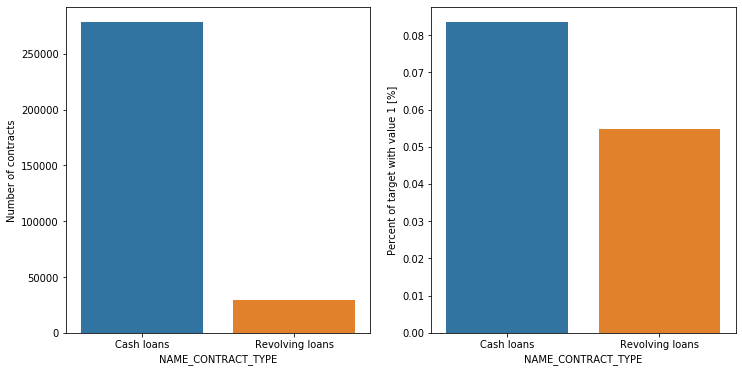

In [19]:
plot_stats('NAME_CONTRACT_TYPE')

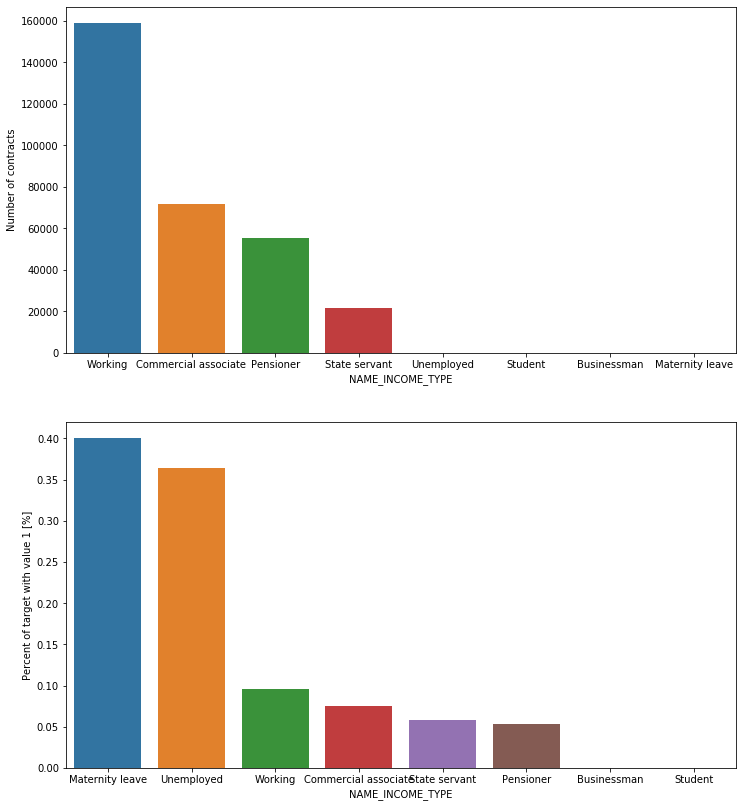

In [20]:
plot_stats('NAME_INCOME_TYPE',False,False)

https://www.kaggle.com/codename007/home-credit-complete-eda-feature-importance

In [21]:
pd.set_option('display.max_rows', 200)

In [22]:
"DAYS_ID_PUBLISH","AMT_INCOME_TOTAL","AMT_CREDIT" 

('DAYS_ID_PUBLISH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT')

In [23]:
print(df.isnull().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [24]:
df.HOUR_APPR_PROCESS_START.dtype

dtype('int64')

In [25]:
df_se1 = df.loc[:,["TARGET","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","AMT_INCOME_TOTAL","AMT_CREDIT","HOUR_APPR_PROCESS_START" ]]
#df_se = df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
df_se1.head()     

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,AMT_INCOME_TOTAL,AMT_CREDIT,HOUR_APPR_PROCESS_START
0,1,-9461,-637,-2120,202500.0,406597.5,10
1,0,-16765,-1188,-291,270000.0,1293502.5,11
2,0,-19046,-225,-2531,67500.0,135000.0,9
3,0,-19005,-3039,-2437,135000.0,312682.5,17
4,0,-19932,-3038,-3458,121500.0,513000.0,11


In [26]:
print(df_se1.isnull().sum())

TARGET                     0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
DAYS_ID_PUBLISH            0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
HOUR_APPR_PROCESS_START    0
dtype: int64


In [27]:
X1 = df_se1.loc[: , ("DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","AMT_INCOME_TOTAL","AMT_CREDIT","HOUR_APPR_PROCESS_START" )]
X1 = X1.values
X1.shape
X1

array([[-9.4610000e+03, -6.3700000e+02, -2.1200000e+03,  2.0250000e+05,
         4.0659750e+05,  1.0000000e+01],
       [-1.6765000e+04, -1.1880000e+03, -2.9100000e+02,  2.7000000e+05,
         1.2935025e+06,  1.1000000e+01],
       [-1.9046000e+04, -2.2500000e+02, -2.5310000e+03,  6.7500000e+04,
         1.3500000e+05,  9.0000000e+00],
       ...,
       [-1.4966000e+04, -7.9210000e+03, -5.1500000e+03,  1.5300000e+05,
         6.7766400e+05,  9.0000000e+00],
       [-1.1961000e+04, -4.7860000e+03, -9.3100000e+02,  1.7100000e+05,
         3.7010700e+05,  9.0000000e+00],
       [-1.6856000e+04, -1.2620000e+03, -4.1000000e+02,  1.5750000e+05,
         6.7500000e+05,  2.0000000e+01]])

In [28]:
y1 = df_se.loc[:, "TARGET"]
y1= y1.values
y1.shape
y1

array([1, 0, 0, ..., 0, 1, 0])

In [29]:
kf = KFold(n_splits=3, shuffle = True, random_state = 5)
sourse = cross_val_score(rfc,X1, y1,scoring='roc_auc', cv=kf)

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
print(sourse)

[0.54870816 0.55443286 0.55032782]


In [31]:
sourse_average = sourse.mean()
print(sourse_average)

0.5511562814893559


# 【問題4】高い汎化性能のモデル作成

問題3で見つけたアイデアと、独自のアイデアを組み合わせ高い汎化性能のモデル作りを進めてください。

その過程として、何を行うことで、クロスバリデーションの結果がどの程度変化したかを表にまとめてください。

In [32]:
df_katei = pd.DataFrame({ '何をしたか？' :pd.Categorical(["特徴量'DAYS_BIRTH''DAYS_EMPLOYED'のみ","特徴量'DAYS_ID_PUBLISH'を追加","特徴量'AMT_INCOME_TOTAL'を追加","特徴量'AMT_CREDIT'を追加","特徴量'HOUR_APPR_PROCESS_START'を追加"]),
                                               'sourse_average' : pd.Categorical(["0.5243629543774119","0.5357667180939996","0.5406561441743657","0.5481233891204913","0.5491365018122345"]),
                                                })

In [33]:
df_katei

,何をしたか？,sourse_average
0,特徴量'DAYS_BIRTH''DAYS_EMPLOYED'のみ,0.5243629543774119
1,特徴量'DAYS_ID_PUBLISH'を追加,0.5357667180939996
2,特徴量'AMT_INCOME_TOTAL'を追加,0.5406561441743657
3,特徴量'AMT_CREDIT'を追加,0.5481233891204913
4,特徴量'HOUR_APPR_PROCESS_START'を追加,0.5491365018122345


# 【問題5】最終的なモデルの選定

最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

In [34]:
### 探索するパラメータ空間
def param1():
  ret = {
      'n_estimators':[10,200],
      'max_depth':[2,20],
  }
  return ret

In [35]:
# GridSearchCVのインスタンスを作成&学習&スコア記録

gscv1 = GridSearchCV(rfc, param(), cv=3)
gscv1.fit(X1, y1)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [36]:
 # スコアの一覧を取得
gs_result_re = pd.DataFrame.from_dict(gscv1.cv_results_)
gs_result_re

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.561712,0.023305,0.044649,0.000957,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.919271,0.919271,0.919271,0.919271,3.712647e-07,1
1,58.544645,3.858969,3.942295,0.137997,2,1000,"{'max_depth': 2, 'n_estimators': 1000}",0.919271,0.919271,0.919271,0.919271,3.712647e-07,1
2,3.464898,0.041675,0.196758,0.007064,20,10,"{'max_depth': 20, 'n_estimators': 10}",0.918930,0.919028,0.918929,0.918962,4.617647e-05,4
3,341.051467,6.831576,18.614415,0.415903,20,1000,"{'max_depth': 20, 'n_estimators': 1000}",0.919271,0.919262,0.919271,0.919268,4.424958e-06,3


In [38]:
gscv1.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
df_X_test_original = pd.read_csv("application_test.csv")
df_X_test_original.head(5)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# 予測
df_X_test = df_X_test_original.loc[: , ("DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","AMT_INCOME_TOTAL","AMT_CREDIT","HOUR_APPR_PROCESS_START" )]
X_test = df_X_test.values

y_test_predict_proba = gscv1.best_estimator_.predict_proba(X_test)

y_test_predict_proba

array([[0.90942657, 0.09057343],
       [0.9343125 , 0.0656875 ],
       [0.93980512, 0.06019488],
       ...,
       [0.92577348, 0.07422652],
       [0.9203538 , 0.0796462 ],
       [0.91447636, 0.08552364]])

In [81]:
df_X_test_original

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [82]:
# SK_ID_CURRとtest_predictをdataframe化
# TARGET列名を指定通りに修正
# df_X_test = pd.DataFrame(a)

test_submit_df = pd.concat([df_X_test_original["SK_ID_CURR"],
                            pd.DataFrame(y_test_predict_proba[:, 1], columns=['TARGET'])], axis=1)

# kaggleに提出するcsv作成
# インデックスをIDに変更
test_submit_df.to_csv("submit_200206.csv", index=False)

In [83]:
# 提出ファイルを出力し中身確認
pd.read_csv("submit_200206.csv").head()

,SK_ID_CURR,TARGET
0,100001,0.090573
1,100005,0.065688
2,100013,0.060195
3,100028,0.079981
4,100038,0.081399
